### Week 5 Assignment
- Wiley Winters
- MSDS 670 &mdash; Data Visualization
- 18-FEB-2024

------------------------------------------------------------------------------------------
### Dataset Information
Dataset: <a href="https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data">Jobs and Salaries in Data Science</a>
Metadata:
- `work_year`: Year in which data was recorded.
- `job_title`: Specific title of the job role.
- `job_category`: Classification of the job role into broader categories for easier analysis
- `salary_currency`: Currency in which the salary is paid
- `salary`: Annual gross salary of the role in the local currency
- `salary_in_usd`: Annual gross salary in USD
- `employee_residence`: Country of residence
- `experience_level`: Classifies the professional experience level of the employee
- `employment_type`: Specifies the type of employment such as *full-time*, *part-time*, *contract*, *etc*
- `work_setting`: Work setting or environment such as *remote*, *in-person*, or *hybrid*
- `company_location`: Country where the company is located
- `company_size`: Size of the employer company categorized as *small (S)*, *medium (M)*, and *large (L)*

**Formal Reference to Dataset**

Qaasim, H. (2023, December). Jobs and Salaries in Data Science.</br> Version 6.
Retrieved December 25, 2023 from <a href="https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data">https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data</a>

------------------------------------------------------------------------
Import required packages and libraries.  Set global configuration items.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import numpy as np

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style and autoconfig
sns.set_style('whitegrid')
rcParams.update({'figure.autolayout': True})

Read dataset into a Pandas DataFrame

In [2]:
jobs_df = pd.read_csv('data/jobs_in_data.csv')
jobs_df.sample(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3799,2023,Data Science Manager,Data Science and Research,USD,245100,245100,United States,Senior,Full-time,In-person,United States,M
54,2023,Research Analyst,Data Science and Research,USD,64000,64000,United States,Entry-level,Full-time,Remote,United States,M
819,2023,Business Intelligence Engineer,BI and Visualization,USD,127000,127000,Canada,Senior,Full-time,In-person,Canada,M
6483,2023,Data Scientist,Data Science and Research,USD,128750,128750,United States,Mid-level,Full-time,In-person,United States,M
2558,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,In-person,United States,M


In [3]:
jobs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


The dataset covers years from 2020 to 2023.  In order to not double count some values.  I will only work with 2023 data

Check some basic items to see if the dataset requires cleaning or not

In [4]:
print(jobs_df.info())
print('\nNaN Values:\n', jobs_df.isna().sum())
print('\nDuplicates: ', jobs_df.duplicated().sum())
print('\nSize: ', jobs_df.size)
print('\nDistribution:\n', jobs_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None

NaN Values:
 work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employ

Looks like there is a lot of duplicates.  I will remove them.

In [5]:
jobs_df.drop_duplicates(keep='first', inplace=True)
jobs_df.duplicated().sum()

0

### Look for interesting items to plot

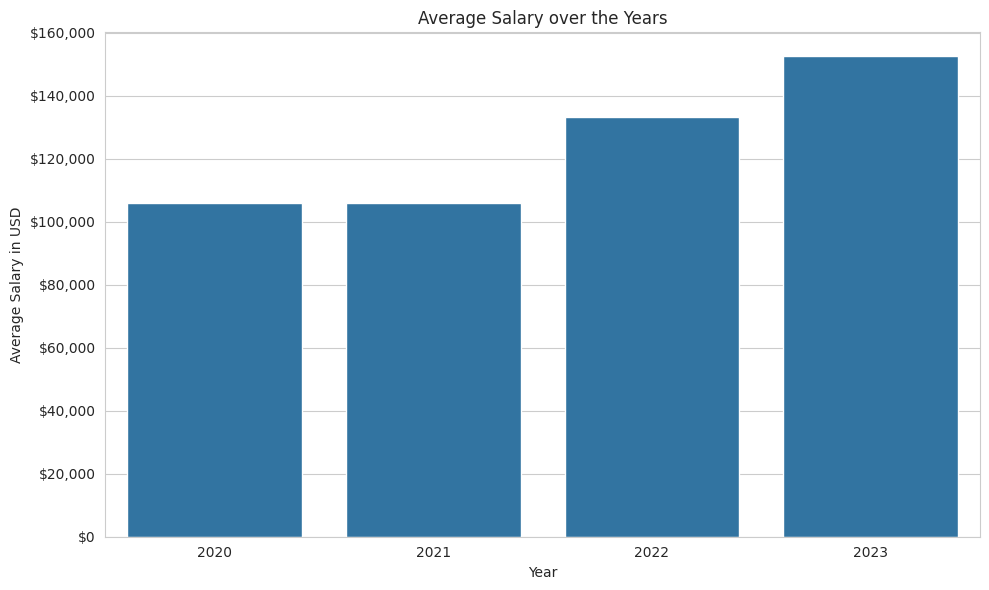

In [6]:
salary_years = jobs_df.groupby('work_year').agg({'salary_in_usd': 'mean'}). \
                               sort_values('work_year')
fig, ax = plt.subplots(figsize=(10,6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set(xlabel='Year',ylabel='Average Salary in USD',title='Average Salary over the Years')
sns.barplot(data=salary_years, y='salary_in_usd', x='work_year')
fig.savefig('images/yearAveSalary.png', bbox_inches='tight', dpi=300)

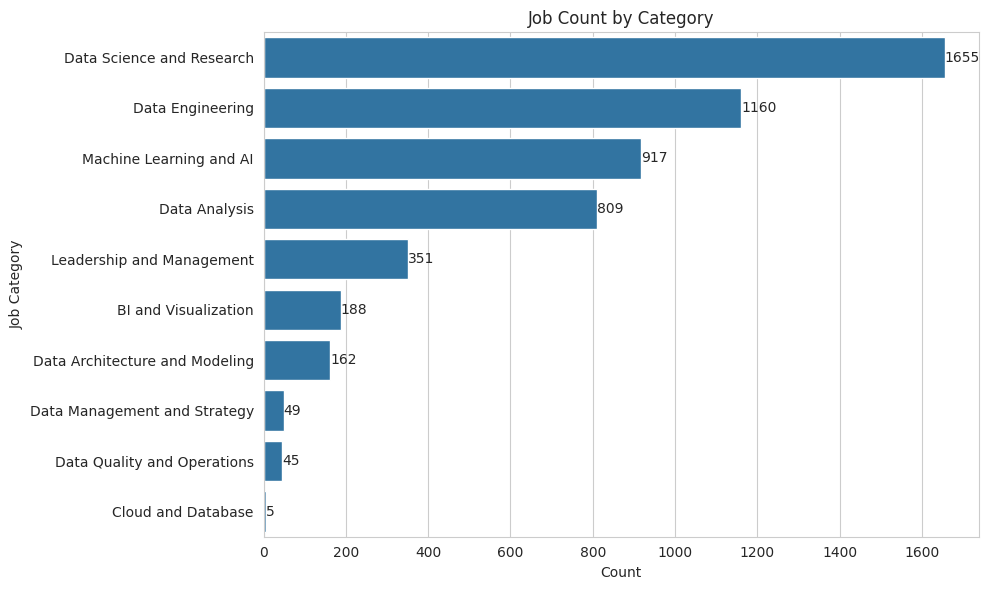

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(ylabel='Job Category',title='Job Count by Category',xlabel='Count')
sns.countplot(ax=ax, data=jobs_df, y='job_category', order=jobs_df['job_category']. \
              value_counts().index)
ax.bar_label(ax.containers[0])
fig.savefig('images/jobCatCount.png', bbox_inches='tight', dpi=300)

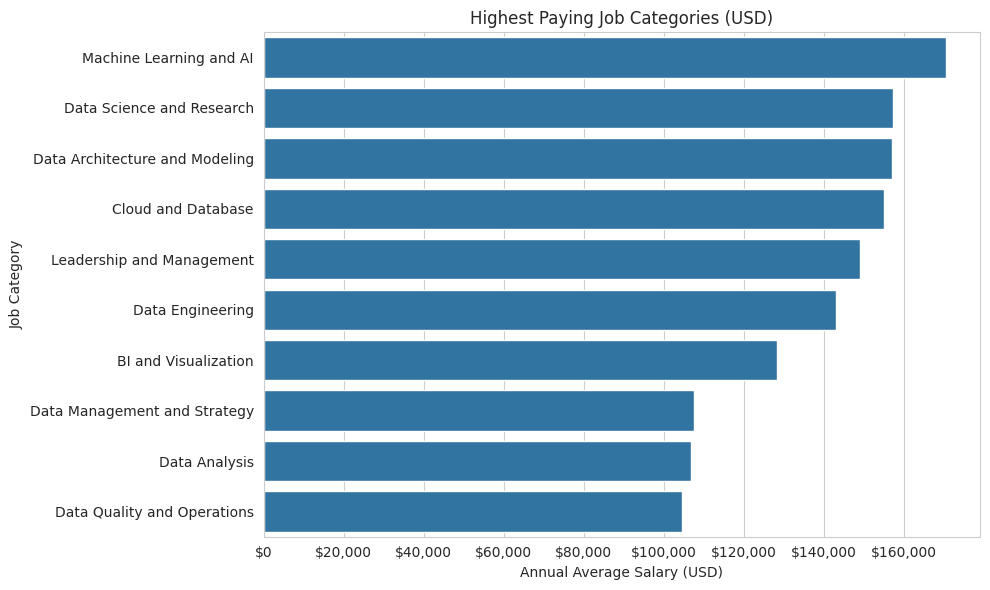

In [8]:
# Highest paying categories in USD
salary = jobs_df.groupby('job_category').agg({'salary_in_usd': 'mean'}). \
                         sort_values('salary_in_usd', ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.set(xlabel='Annual Average Salary (USD)',ylabel='Job Category', \
       title='Highest Paying Job Categories (USD)')
sns.barplot(data=salary, y='job_category', x='salary_in_usd')
fig.savefig('images/highJobCatUSD.png', bbox_inches='tight', dpi=300)

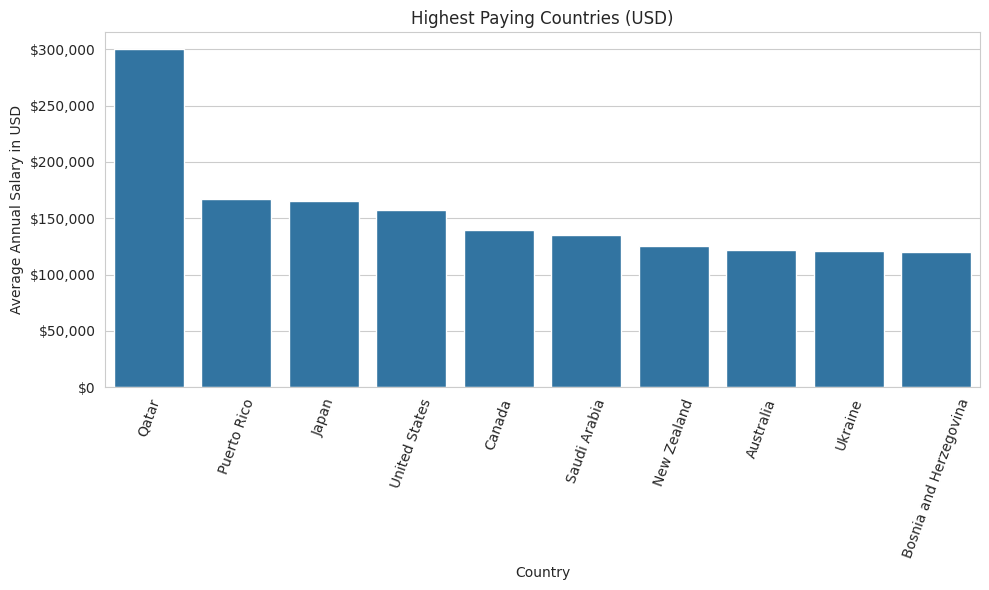

In [9]:
# Highest pay by company_location in USD. Top 10
pay_country = jobs_df.groupby('company_location').agg({'salary_in_usd': 'mean'}). \
                               sort_values('salary_in_usd', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set(xlabel='Country',ylabel='Average Annual Salary in USD', \
       title='Highest Paying Countries (USD)')
sns.barplot(data=pay_country, x='company_location', y='salary_in_usd')
plt.xticks(rotation=70)
fig.savefig('images/highCountryUSD.png', bbox_inches='tight', dpi=300)

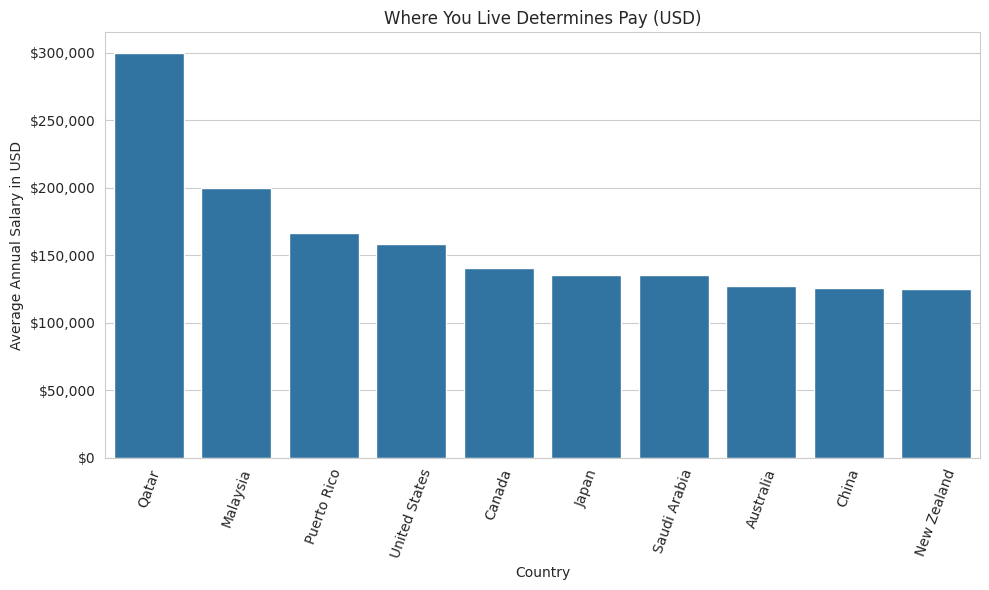

In [10]:
# Highest pay by employee_residence in USD. Top 10
pay_residence = jobs_df.groupby('employee_residence').agg({'salary_in_usd': 'mean'}). \
                               sort_values('salary_in_usd', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set(xlabel='Country',ylabel='Average Annual Salary in USD', \
       title='Where You Live Determines Pay (USD)')
sns.barplot(data=pay_residence, x='employee_residence', y='salary_in_usd')
plt.xticks(rotation=70)
fig.savefig('images/highResidenceUSD.png', bbox_inches='tight', dpi=300)

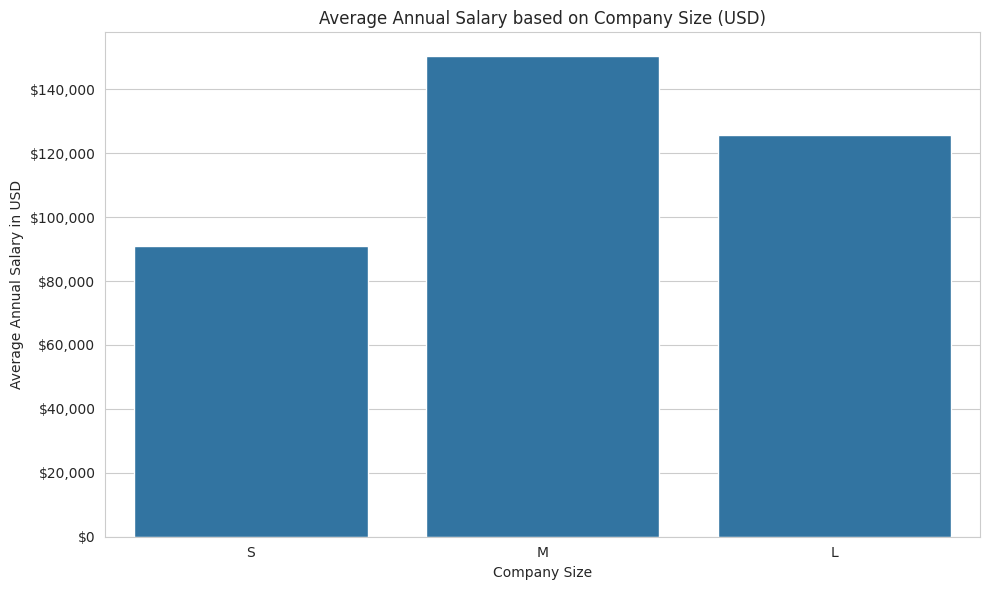

In [11]:
# Average Salary by company_size
size = jobs_df.groupby('company_size').agg({'salary_in_usd': 'mean'}). \
                        sort_values('company_size', ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set(xlabel='Company Size', ylabel='Average Annual Salary in USD', \
       title='Average Annual Salary based on Company Size (USD)')
sns.barplot(data=size, x='company_size', y='salary_in_usd')
fig.savefig('images/aveCompanySize.png', bbox_inches='tight', dpi=300)

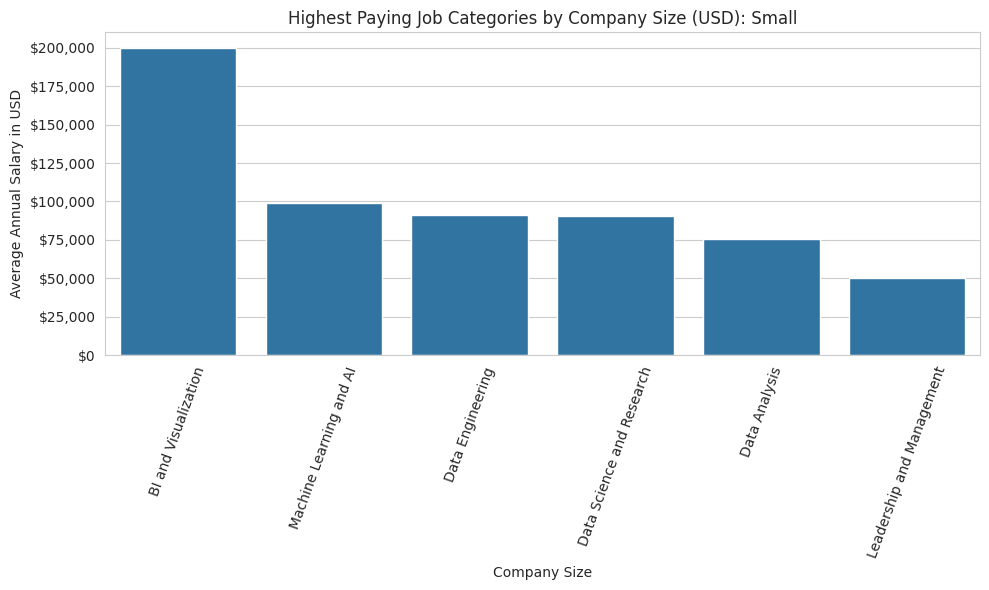

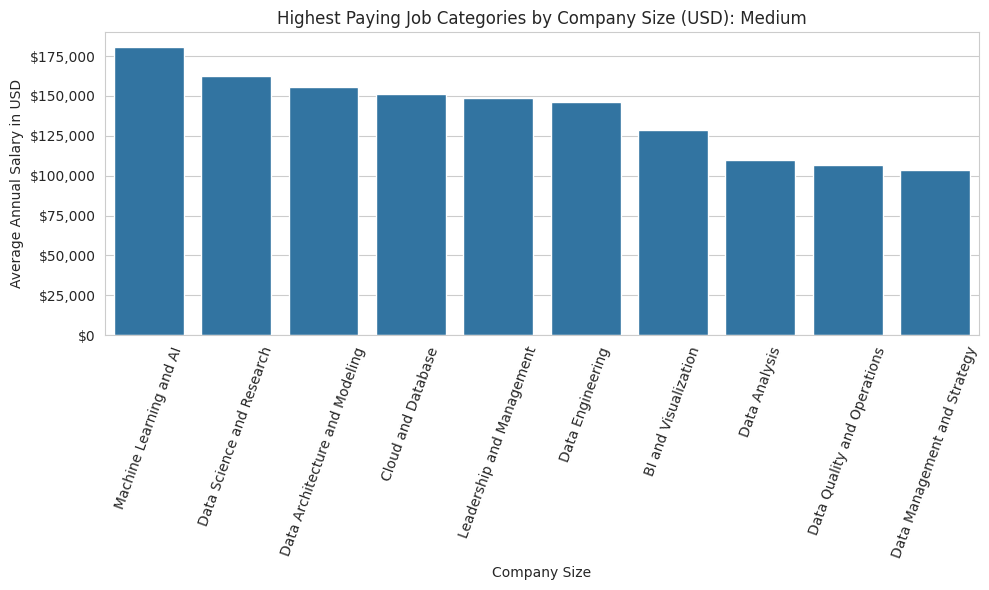

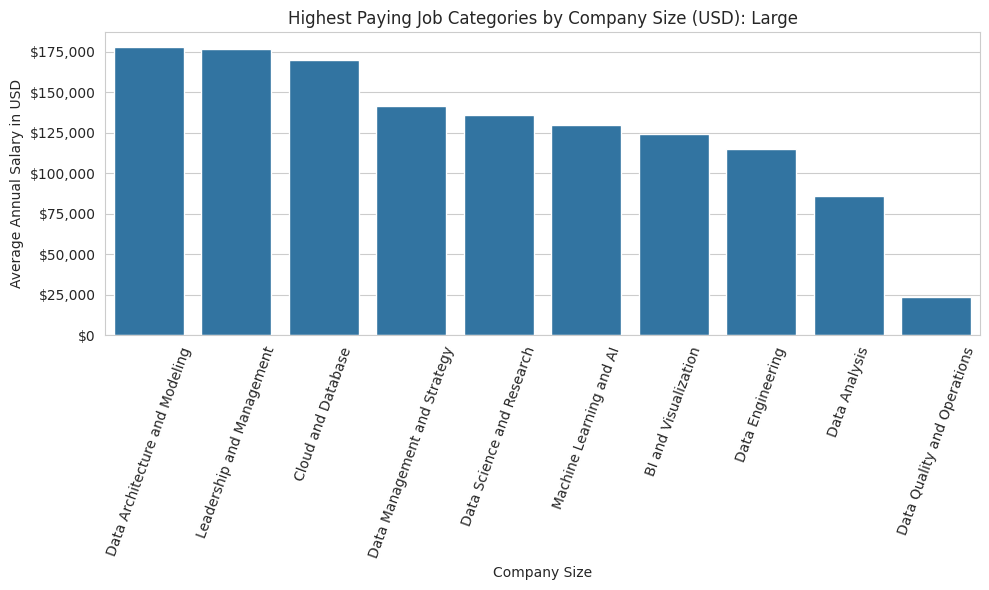

In [12]:
sizes = {'S':'Small','M':'Medium','L':'Large'}

for key in sizes:
    size = jobs_df[jobs_df['company_size'] == key]
    comp_size = size.groupby('job_category').agg({'salary_in_usd': 'mean'}). \
                                sort_values('salary_in_usd', ascending=False)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set(xlabel='Company Size', ylabel='Average Annual Salary in USD', \
           title=f'Highest Paying Job Categories by Company Size (USD): {sizes[key]}')
    plt.xticks(rotation=70)
    sns.barplot(data=comp_size,x='job_category', y='salary_in_usd')
    fig.savefig('images/'+sizes[key]+'Cat.png', bbox_inches='tight', dpi=300)

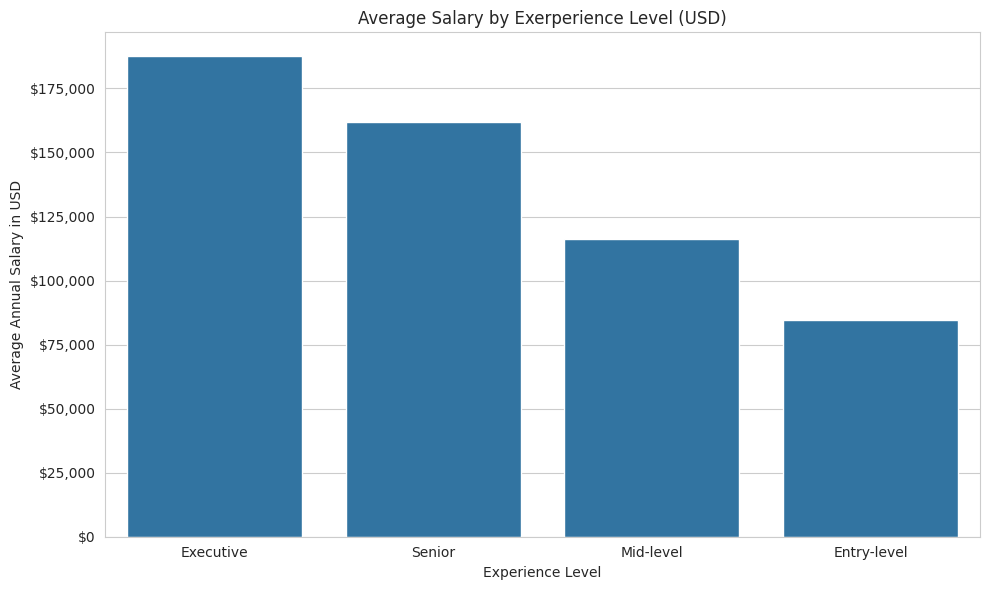

In [13]:
# Salary based on experience level
experience = jobs_df.groupby('experience_level').agg({'salary_in_usd': 'mean'}). \
                             sort_values('salary_in_usd', ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set(xlabel='Experience Level', ylabel='Average Annual Salary in USD', \
       title='Average Salary by Exerperience Level (USD)')
sns.barplot(data=experience, x='experience_level', y='salary_in_usd')
fig.savefig('images/salaryByexperience.png', bbox_inches='tight', dpi=300)

Explore each experience level to see what job categories pay the most in USD

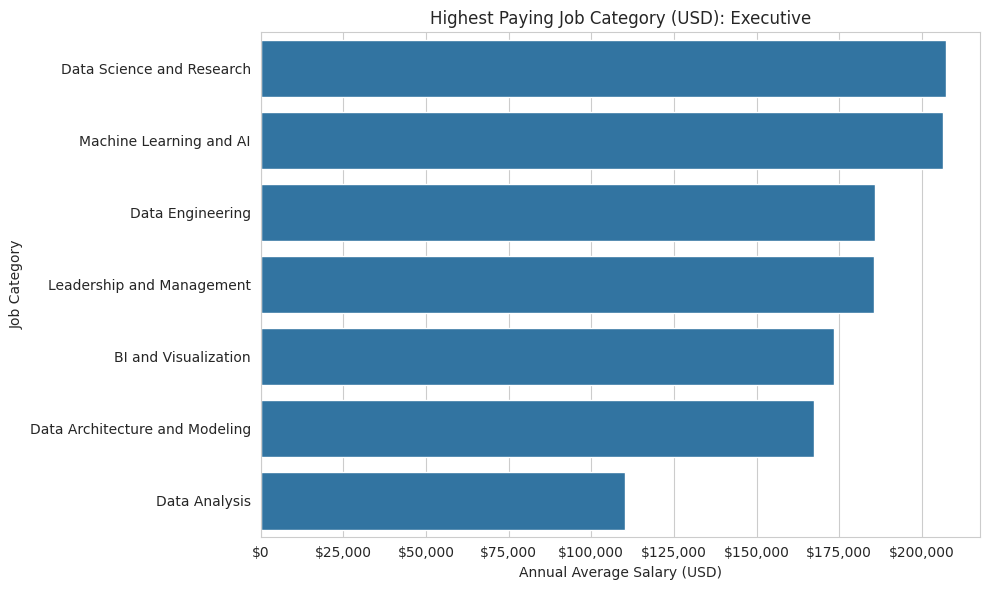

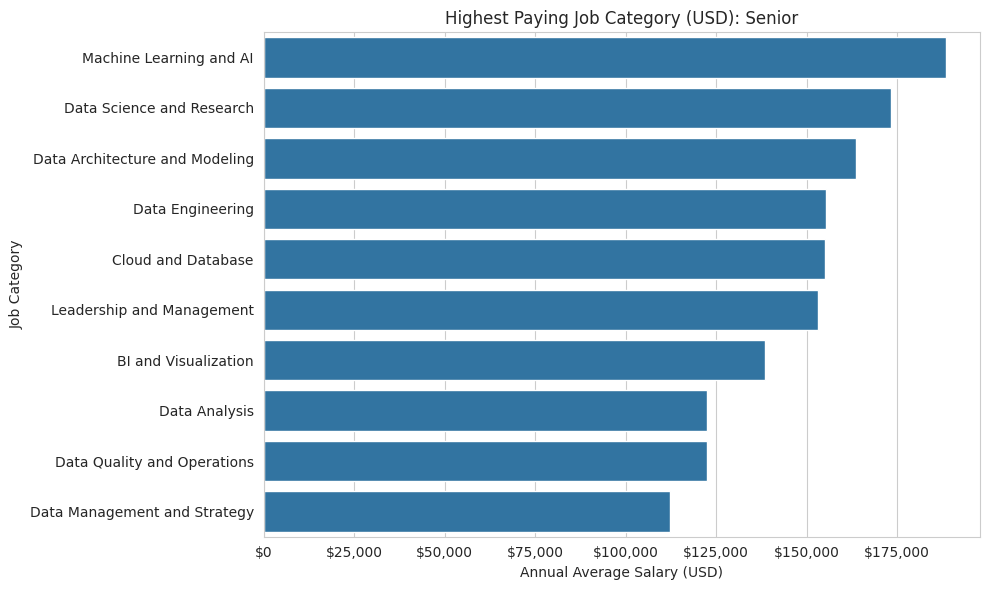

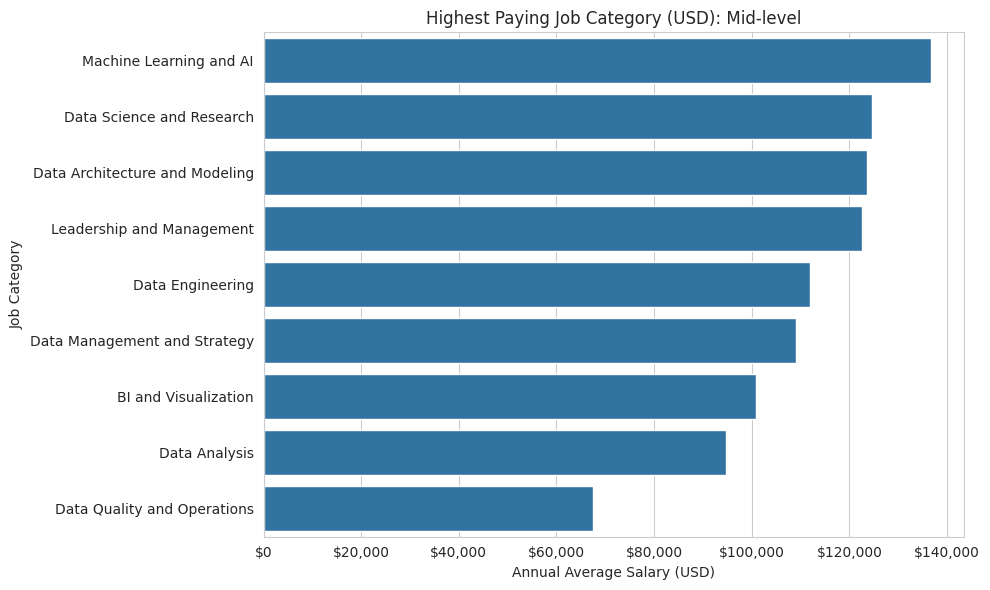

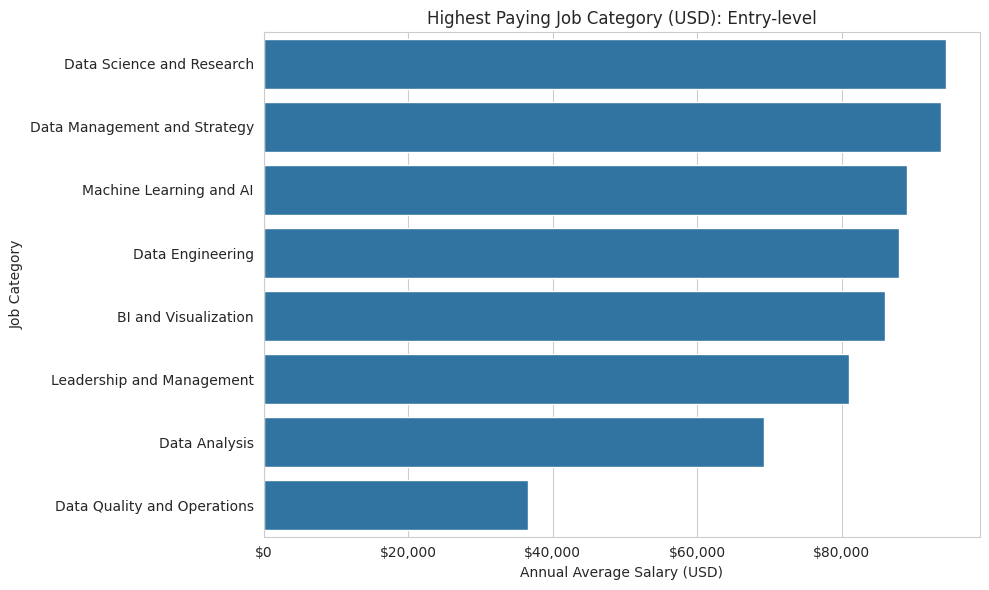

In [14]:
# Look at salary based on experience level for all levels
experiences = ['Executive','Senior','Mid-level','Entry-level']
for i in range(len(experiences)):
    exp = jobs_df[jobs_df['experience_level'] == experiences[i]]
    salary = exp.groupby('job_category').agg({'salary_in_usd': 'mean'}). \
                         sort_values('salary_in_usd', ascending=False)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set(xlabel='Annual Average Salary (USD)', ylabel='Job Category', \
           title=f'Highest Paying Job Category (USD): {experiences[i]}')
    sns.barplot(data=salary, y='job_category', x='salary_in_usd')
    fig.savefig('images/'+experiences[i]+'.png', bbox_inches='tight', dpi=300)